In [1]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import itertools  
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



# First Thermal model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/Thermal Images/training/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/Thermal Images/testing/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/y_labels_training.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/y_labels_testing.csv')
y1_test.values.reshape(-1,1)

n_classes = 8
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape

#Secound Camera model

image_list = []

def my_load_Train_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/Camera Images/training/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/Camera Images/testing/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X2_train = my_load_Train_data_2()
X2_test = my_load_Test_data_2()
print(len(X2_test))
y2_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/y_labels_training.csv')
y2_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Data_Augmentation/y_labels_testing.csv')
y2_test.values.reshape(-1,1)

n_classes = 8
X2_train = np.array(X2_train)
Y2_train = np.array(y2_train)
X2_test = np.array(X2_test)
Y2_test = np.array(y2_test)

Y2_train = np_utils.to_categorical(Y2_train, n_classes)
Y2_test = np_utils.to_categorical(Y2_test, n_classes)


# Model 1(Thermal)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)

# Model 2

# convolutional layer
inp2 = Input(shape=(32, 32, 3))

# convolutional layer
conv1 =Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp2)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=Dense(25, activation='relu')(flat1)
dense2=Dense(10, activation='relu')(hidd1)
output2=Flatten()(dense2)

print(output1)
print(output2)

# concatinate two models 

concat1 = concatenate([output1, output2])

Out  = Dense(8, activation='softmax')(concat1)

model_concat = Model(inputs=[inp1, inp2], outputs = Out)

# compiling the sequential model
model_concat.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 




# training the model for 10 epochs
history= model_concat.fit([X1_train,X2_train],Y2_train, batch_size=128,epochs=15,validation_data=([X1_test,X2_test],Y2_test))




3600
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='flatten_3/Reshape:0', description="created by layer 'flatten_3'")
Epoch 1/15
141/141 [==============================] - 414s 3s/step - loss: 1.6145 - accuracy: 0.4007 - val_loss: 1.1089 - val_accuracy: 0.5786
Epoch 2/15
141/141 [==============================] - 410s 3s/step - loss: 0.8738 - accuracy: 0.6876 - val_loss: 0.9645 - val_accuracy: 0.6394
Epoch 3/15
141/141 [==============================] - 407s 3s/step - loss: 0.6408 - accuracy: 0.7719 - val_loss: 0.8071 - val_accuracy: 0.7175
Epoch 4/15
141/141 [==============================] - 419s 3s/step - loss: 0.4923 - accuracy: 0.8226 - val_loss: 0.8078 - val_accuracy: 0.6961
Epoch 5/15
141/141 [==============================] - 419s 3s/step - loss: 0.4181 - accuracy: 0.8488 - val_loss: 0.74

In [2]:
model_concat.save('Concat_Model')
#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_concat.evaluate([X1_test,X2_test],Y2_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

INFO:tensorflow:Assets written to: Concat_Model\assets
29/29 [==============================] - 18s 629ms/step - loss: 1.2633 - accuracy: 0.7611
[INFO] Accuracy: 76.11%
[INFO] Loss: 1.2632991075515747
Time:  0:00:18.227801


Fusion of thermal_bottle215.jpg and camera_chair258.jpg are: 
Input image: chair_bottle

probality of chair_bottle:  0.009533931006444618

probality of plate_bottle:  8.390186727046967

probality of spectacle_laptop:  84.26875472068787

probality of table_bottle:  0.00029439818263199413

probality of table_chair:  0.07945287507027388

probality of table_laptop:  9.275237466965791e-07

probality of table_plate:  0.020154153753537685

probality of table_spectacle:  7.2316281497478485


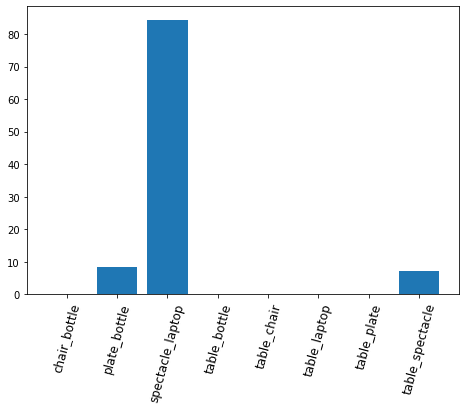

__________________________________________________________________
Fusion of thermal_bottle215.jpg and camera_plate273.jpg are: 
Input image: plate_bottle

probality of chair_bottle:  7.08991065621376

probality of plate_bottle:  3.1454820259568805e-05

probality of spectacle_laptop:  8.717498928308487

probality of table_bottle:  5.21012581884861

probality of table_chair:  66.70541763305664

probality of table_laptop:  4.626313224434853

probality of table_plate:  0.00024912906155805103

probality of table_spectacle:  7.650448381900787


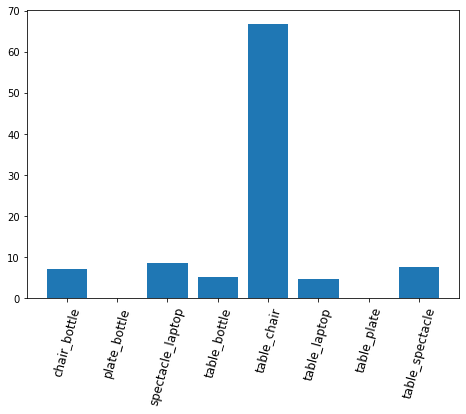

__________________________________________________________________
Fusion of thermal_laptop258.jpg and camera_spectacle279.jpg are: 
Input image: spectacle_laptop

probality of chair_bottle:  0.011863663530675694

probality of plate_bottle:  1.5265733566138806e-06

probality of spectacle_laptop:  0.574391707777977

probality of table_bottle:  45.89720666408539

probality of table_chair:  4.0728588240174744e-13

probality of table_laptop:  1.3375610308230534e-05

probality of table_plate:  53.50341796875

probality of table_spectacle:  0.013113782915752381


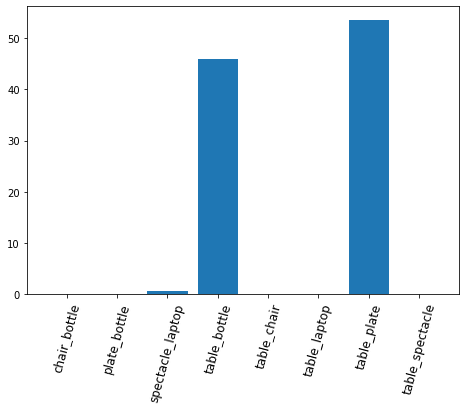

__________________________________________________________________
Fusion of thermal_bottle215.jpg and camera_table252.jpg are: 
Input image: table_bottle

probality of chair_bottle:  0.00020722702629427658

probality of plate_bottle:  0.017400161596015096

probality of spectacle_laptop:  0.07213130011223257

probality of table_bottle:  0.0029173254006309435

probality of table_chair:  2.0574093593210422e-13

probality of table_laptop:  8.387368577444931e-09

probality of table_plate:  37.3866468667984

probality of table_spectacle:  62.520694732666016


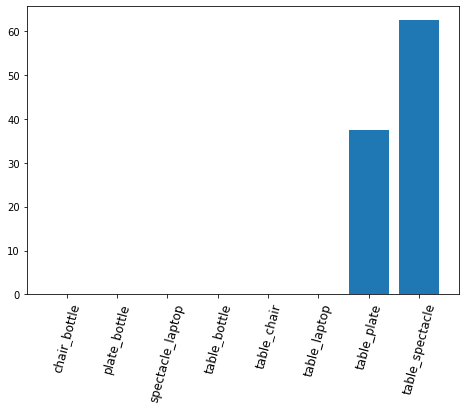

__________________________________________________________________
Fusion of thermal_chair261.jpg and camera_table252.jpg are: 
Input image: table_chair

probality of chair_bottle:  5.548209287553618e-05

probality of plate_bottle:  7.893958553495395e-06

probality of spectacle_laptop:  0.08698076126165688

probality of table_bottle:  0.000936443484533811

probality of table_chair:  3.0805701554022246e-14

probality of table_laptop:  7.345687391691058e-08

probality of table_plate:  45.44991850852966

probality of table_spectacle:  54.462093114852905


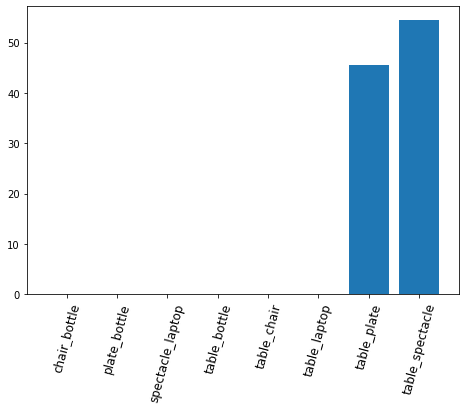

__________________________________________________________________
Fusion of thermal_laptop258.jpg and camera_table252.jpg are: 
Input image: table_laptop

probality of chair_bottle:  0.02141882141586393

probality of plate_bottle:  2.9373024013068516e-07

probality of spectacle_laptop:  0.05394101608544588

probality of table_bottle:  7.200388610363007

probality of table_chair:  2.61854782869069e-14

probality of table_laptop:  1.5628524252520037e-06

probality of table_plate:  92.7212655544281

probality of table_spectacle:  0.0029832626751158386


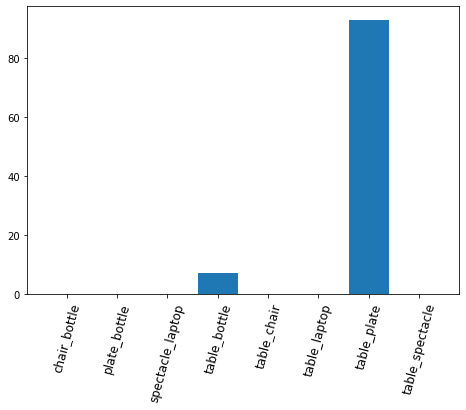

__________________________________________________________________
Fusion of thermal_plate260.jpg and camera_table252.jpg are: 
Input image: table_plate

probality of chair_bottle:  0.10703100124374032

probality of plate_bottle:  9.953078361490952e-07

probality of spectacle_laptop:  4.557820716399874e-05

probality of table_bottle:  0.0008910449651011731

probality of table_chair:  9.864364436396045e-07

probality of table_laptop:  0.0021400494006229565

probality of table_plate:  91.87449216842651

probality of table_spectacle:  8.015388250350952


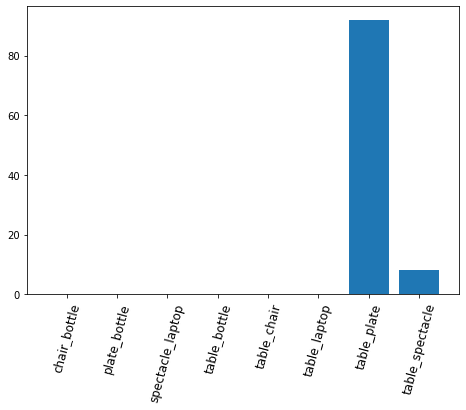

__________________________________________________________________
Fusion of thermal_spectacle261.jpg and camera_table252.jpg are: 
Input image: table_spectacle

probality of chair_bottle:  2.014395941718483e-09

probality of plate_bottle:  5.1656914561638967e-23

probality of spectacle_laptop:  1.8066377560632674e-08

probality of table_bottle:  5.316783679987225e-08

probality of table_chair:  1.090237705751165e-12

probality of table_laptop:  2.521019925748238e-13

probality of table_plate:  100.0

probality of table_spectacle:  2.527808894820481e-13


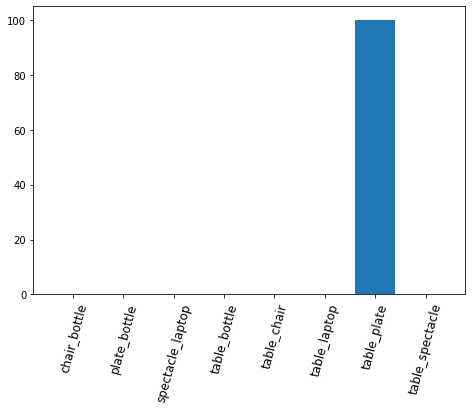

__________________________________________________________________


In [3]:

# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


ListPic1 = ['thermal_bottle215.jpg','thermal_bottle215.jpg','thermal_laptop258.jpg','thermal_bottle215.jpg',
           'thermal_chair261.jpg','thermal_laptop258.jpg','thermal_plate260.jpg','thermal_spectacle261.jpg']


ListPic2 = ['camera_chair258.jpg','camera_plate273.jpg','camera_spectacle279.jpg','camera_table252.jpg',
             'camera_table252.jpg','camera_table252.jpg','camera_table252.jpg','camera_table252.jpg'] 


ListPic2[0]
for i in range(len(ListPic1)): 

 
    # load the image thermal
    img1 = load_img(ListPic1[i], target_size=(32, 32))
    # convert to array
    img1 = img_to_array(img1)
    # reshape into a single sample with 3 channels
    img1 = img1.reshape(1,32, 32, 3)
    # prepare pixel data
    img1 = img1.astype('float32')
    img1 = img1 / 255.0

 # for second Model
 # load the camera image
    
    img2 = load_img(ListPic2[i], target_size=(32, 32))
    # convert to array
    img2 = img_to_array(img2)
    # reshape into a single sample with 3 channels
    img2 = img2.reshape(1,32, 32, 3)
    # prepare pixel data
    img2 = img2.astype('float32')
    img2 = img2 / 255.0
    

    x = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
    print('Fusion of ' +ListPic1[i]+ ' and ' +ListPic2[i]+ ' are: ')
    result = model_concat.predict([img1,img2])
    #print(result)
    #print(item1,item2)
 
   
    print('Input image:',x[i])
    #print(result)
    print('')
    Bed = result[0][0]*100
    print("probality of chair_bottle: ", Bed)
    print()
    Bottle = result[0][1]*100
    print("probality of plate_bottle: ", Bottle)
    print()
    Chair = result[0][2]*100
    print("probality of spectacle_laptop: ", result[0][2]*100)
    print()
    Laptop = result[0][3]*100
    print("probality of table_bottle: ", result[0][3]*100)
    print()
    Plate = result[0][4]*100
    print("probality of table_chair: ", result[0][4]*100)
    print()
    Sofa = result[0][5]*100   
    print("probality of table_laptop: ", result[0][5]*100)
    print()
    Spectacle = result[0][6]*100
    print("probality of table_plate: ", result[0][6]*100)
    print()
    Table = result[0][7]*100   
    print("probality of table_spectacle: ", result[0][7]*100)
    
    # importing the required module
    import matplotlib.pyplot as plt
  
    fig = plt.figure()
    plt.rcParams['xtick.labelsize'] = 'large' 
    ax = fig.add_axes([0,0,1,1])    

    # x axis values
    x = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
    # corresponding y axis values
    y = [Bed,Bottle,Chair,Laptop,Plate,Sofa,Spectacle,Table]

    ax.bar(x,y)
    plt.xticks(rotation=75)
    plt.show()   
    
    print("__________________________________________________________________")

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools  


preds = np.round(model_concat.predict([X1_test,X2_test]),0)
#print('rounded test_labels', preds)


print('Classification Matrix')

fusion = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
classification_metrics = metrics.classification_report(Y2_test, preds,target_names = fusion)
print(classification_metrics)

print('Confusion Matrix')

sign=[0,1,2,3,4,5,6,7]
cf_matrix = confusion_matrix(Y2_test.argmax(axis=1), preds.argmax(axis=1),sign)
print(cf_matrix)

Classification Matrix
                  precision    recall  f1-score   support

    chair_bottle       0.84      0.68      0.75       450
    plate_bottle       0.99      0.99      0.99       450
spectacle_laptop       0.84      0.61      0.71       450
    table_bottle       0.64      0.63      0.63       450
     table_chair       0.90      0.96      0.93       450
    table_laptop       0.75      0.81      0.77       450
     table_plate       0.56      0.73      0.63       450
 table_spectacle       0.71      0.63      0.67       450

       micro avg       0.77      0.76      0.76      3600
       macro avg       0.78      0.76      0.76      3600
    weighted avg       0.78      0.76      0.76      3600
     samples avg       0.76      0.76      0.76      3600

Confusion Matrix
[[314   1  12   9  12  31  45  26]
 [  2 446   0   1   0   0   0   1]
 [ 20   0 275  40   5  11  45  54]
 [  9   0  11 282  10  40  87  11]
 [  0   0   0   0 433   8   8   1]
 [ 34   0   3  10  17 363  10

C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Normalized confusion matrix


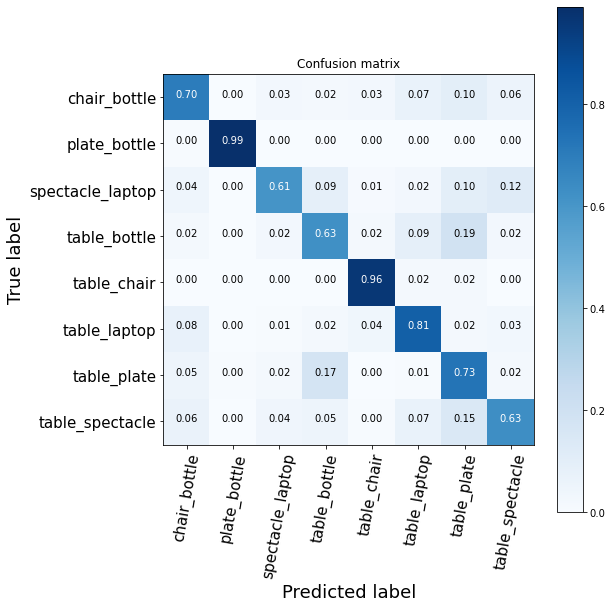

In [5]:
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix

categorical_test_labels = pd.DataFrame(Y1_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 #‘’’prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
   plt.figure(figsize=(8, 8))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
    
    # Labels, title and ticks
   label_font = {'size':'18'}  # Adjust to fit
   plt.xlabel('Predicted label', fontdict=label_font);
   plt.ylabel('True label', fontdict=label_font);
   plt.tick_params(labelsize = 15) 
   plt.xticks(rotation=80)   
    
    
plot_confusion_matrix(confusion_matrix, fusion , normalize= True) 